# How to work with pp_network.py

*pp_network.py* has a class called *net_model* that handles the whole network side of our simulation. The network state object includes a pandapower object called *net* as well as methods to implement actions, calculate the reward, and run simulations on *net*.

Another matpower note: net.line has an attribute 'in_service' so it should be easy for us to simulate a fallen line


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandapower as pp
import pandapower.networks
import pandapower.plotting

In [2]:
import pp_network
from pp_network import *

# Trouble Shoot 

Try to figure out the rural_1 network, for example

In [3]:
network_model = pp_network.net_model('rural_1')

In [6]:
net = network_model.pp_net

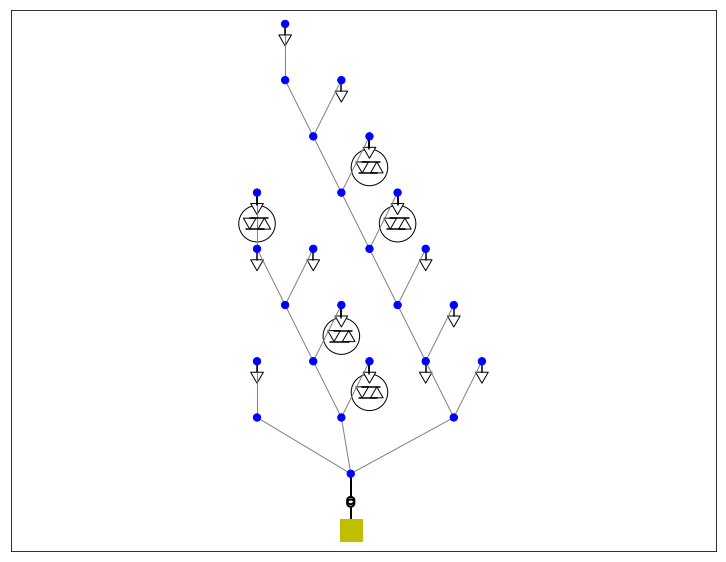

In [30]:

pp.plotting.simple_plot(net,plot_loads=True,load_size=2,plot_sgens=True,sgen_size=5,plot_line_switches=True)


In [7]:
net

This pandapower network includes the following parameter tables:
   - bus (26 elements)
   - load (14 elements)
   - sgen (5 elements)
   - ext_grid (1 element)
   - line (24 elements)
   - trafo (1 element)
   - bus_geodata (26 elements)

In [8]:
net.trafo

,name,std_type,hv_bus,lv_bus,sn_kva,vn_hv_kv,vn_lv_kv,vsc_percent,vscr_percent,pfe_kw,...,tp_mid,tp_min,tp_max,tp_st_percent,tp_st_degree,tp_pos,tp_phase_shifter,parallel,df,in_service
0,None,0.16 MVA 20/0.4 kV vc,0,1,160.0,20.0,0.4,4.0,0.96,0.62,...,0,-2,2,2.5,0.0,0,False,1,1.0,True


In [9]:
net.ext_grid

,name,bus,vm_pu,va_degree,in_service
0,None,0,1.0,0.0,True


In [10]:
net.sgen

,name,bus,p_kw,q_kvar,sn_kva,scaling,in_service,type
0,None,8,-6.9,0.0,NaN,1.0,True,None
1,None,9,-15.3,0.0,NaN,1.0,True,None
2,None,11,-29.6,0.0,NaN,1.0,True,None
3,None,22,-15.8,0.0,NaN,1.0,True,None
4,None,23,-25.3,0.0,NaN,1.0,True,None


In [11]:
net.load

,name,bus,p_kw,q_kvar,const_z_percent,const_i_percent,sn_kva,scaling,in_service,type
0,None,3,5.1,0.0,0.0,0.0,NaN,1.0,True,None
1,None,8,5.1,0.0,0.0,0.0,NaN,1.0,True,None
2,None,9,5.1,0.0,0.0,0.0,NaN,1.0,True,None
3,None,10,5.1,0.0,0.0,0.0,NaN,1.0,True,None
4,None,11,5.1,0.0,0.0,0.0,NaN,1.0,True,None
5,None,19,5.1,0.0,0.0,0.0,NaN,1.0,True,None
6,None,20,5.1,0.0,0.0,0.0,NaN,1.0,True,None
7,None,21,5.1,0.0,0.0,0.0,NaN,1.0,True,None
8,None,22,5.1,0.0,0.0,0.0,NaN,1.0,True,None
9,None,23,5.1,0.0,0.0,0.0,NaN,1.0,True,None


# Look at case14 problem

In [31]:
network_model = pp_network.net_model('case14')

In [35]:
net = network_model.pp_net()
net

This pandapower network includes the following parameter tables:
   - bus (14 elements)
   - load (11 elements)
   - gen (4 elements)
   - shunt (1 element)
   - ext_grid (1 element)
   - line (15 elements)
   - trafo (5 elements)
   - polynomial_cost (5 elements)
   - bus_geodata (14 elements)
 and the following results tables:
   - res_ext_grid (1 element)
   - res_load (11 elements)
   - res_shunt (1 element)
   - res_gen (4 elements)
   - res_bus (14 elements)
   - res_line (15 elements)
   - res_trafo (5 elements)

In [37]:
net.gen

,bus,controllable,in_service,max_p_kw,max_q_kvar,min_p_kw,min_q_kvar,name,p_kw,scaling,sn_kva,type,vm_pu
0,1,True,True,0.0,40000.0,-140000.0,-50000.0,None,-40000.0,1.0,NaN,None,1.045
1,2,True,True,0.0,0.0,-100000.0,-40000.0,None,0.0,1.0,NaN,None,1.010
2,5,True,True,0.0,6000.0,-100000.0,-24000.0,None,0.0,1.0,NaN,None,1.070
3,7,True,True,0.0,6000.0,-100000.0,-24000.0,None,0.0,1.0,NaN,None,1.090


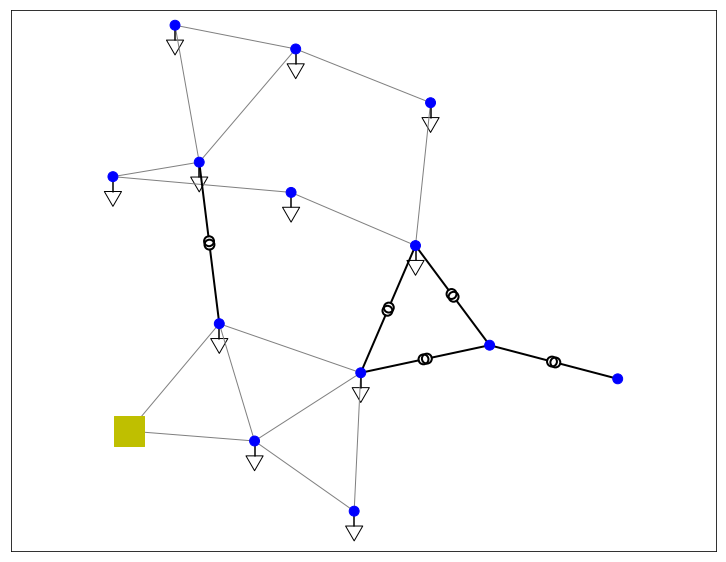

In [36]:
pp.plotting.simple_plot(net,plot_loads=True,load_size=2,plot_sgens=True,sgen_size=5,plot_line_switches=True)

In [38]:
from pandapower.plotting.plotly import pf_res_plotly
pf_res_plotly(net)

NameError: name '__version__' is not defined

## Initialize network

Options to initialize: 'case5','case9','case14','rural_1','rural_2','village_1','village_2','suburb_1','iceland',etc... Basically pick anything from https://pandapower.readthedocs.io/en/v1.6.0/networks.html

In [3]:
network_model = pp_network.net_model('rural_1', zero_out_gens = True)

In [4]:
print('Number of load buses: ',network_model.num_loadbus)
print('Which buses are they on: ',network_model.loadbuses)
print('Number of generator buses: ',network_model.num_sgen)
print('Number of normal generators: ',network_model.num_gen)

Number of load buses:  14
Which buses are they on:  [ 3  8  9 10 11 19 20 21 22 23 24 25  7 13]
Number of generator buses:  5
Number of normal generators:  0


### Look at powerflows to begin with: 

In [5]:
net = network_model.pp_net
pp.runpp(net,enforce_q_lims=True)



In [6]:
net.res_line

,p_from_kw,q_from_kvar,p_to_kw,q_to_kvar,pl_kw,ql_kvar,i_from_ka,i_to_ka,i_ka,loading_percent
0,5.111852,0.000067,-5.103035,-8.701788e-05,0.008817,-0.000020,0.007372,0.007372,0.007372,2.730343
1,5.103035,0.000087,-5.100000,-1.682411e-13,0.003035,0.000087,0.007372,0.007372,0.007372,5.191498
2,-23.177518,0.094538,23.270240,-6.063032e-02,0.092722,0.033907,0.033425,0.033425,0.033425,12.379685
3,-21.470613,0.060891,21.549548,-3.229992e-02,0.078935,0.028591,0.030840,0.030840,0.030840,11.422299
4,-11.361422,0.031077,11.383363,-2.441586e-02,0.021941,0.006661,0.016260,0.016260,0.016260,6.022119
5,-16.486331,0.024345,16.532353,-8.430422e-03,0.046022,0.015914,0.023549,0.023549,0.023549,8.721723
6,-1.799627,-0.000261,1.800000,-3.600398e-14,0.000373,-0.000261,0.002585,0.002585,0.002585,1.820393
7,-10.188126,0.001223,10.200000,-1.436161e-12,0.011874,0.001223,0.014581,0.014581,0.014581,10.267970
8,5.102967,0.000071,-5.100000,1.193239e-12,0.002967,0.000071,0.007289,0.007289,0.007289,5.133056
9,-24.432353,0.008430,24.500000,-1.058558e-11,0.067647,0.008430,0.034801,0.034801,0.034801,24.508025


### Fake test data

In [7]:
num_times = 24*60
p_load_data = 1.0*np.ones((network_model.num_loadbus,num_times))
q_load_data = 0.0*np.ones((network_model.num_loadbus,num_times))

## Add generators

In [8]:
network_model.add_sgeneration(7,1.0) 
# Add a generator at bus 7 and initialize its real power production as 1 kW
network_model.add_sgeneration(10,1.0)

# Add battery

In [9]:
network_model.add_battery(3,1.0,10,0.0) # Initialize at bus 3 with power flow 1.0 (charging), capacity 10 kWh, initialy SOC 0 %

## Update loads and run a powerflow

In [10]:
network_model.update_loads(p_load_data[:,0],q_load_data[:,0])

In [11]:
network_model.run_powerflow(check=True)

Loads everywhere:      p_kw  q_kvar
0    1.0     0.0
1    1.0     0.0
2    1.0     0.0
3    1.0     0.0
4    1.0     0.0
5    1.0     0.0
6    1.0     0.0
7    1.0     0.0
8    1.0     0.0
9    1.0     0.0
10   1.0     0.0
11   1.0     0.0
12   1.0     0.0
13   1.0     0.0
Res_bus:         vm_pu  va_degree       p_kw    q_kvar
0   1.000000   0.000000  73.486698 -1.811414
1   1.004149   1.028200   0.000000  0.000000
2   1.003476   1.013374   0.000000  0.000000
3   1.003244   1.011661   2.000000  0.000000
4   1.011690   1.195860   0.000000  0.000000
5   1.018231   1.339410   0.000000  0.000000
6   1.022352   1.429198   0.000000  0.000000
7   1.026814   1.525516   2.000000  0.000000
8   1.012368   1.200824  -5.900000  0.000000
9   1.019863   1.351278 -14.300000  0.000000
10  1.022124   1.427547   2.000000  0.000000
11  1.030045   1.548822 -28.600000  0.000000
12  1.007009   1.091809   0.000000  0.000000
13  1.009958   1.156975   1.000000  0.000000
14  1.013083   1.225564   0.000000  0.000

In [12]:
network_model.energy_capacities

array([10.])

# Inspect results

In [12]:
# print('Real powerflows on the lines: ')
# print(network_model.p_lineflow)

# Key Documentation: 

https://pandapower.readthedocs.io/en/v1.6.0/elements.html

Continuing to work on this and will check it is working